**Installing Filesystem Interface**

In [ ]:
pip install fsspec

     |████████████████████████████████| 92kB 5.0MB/s 


**Uploading files**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 0708.csv to 0708.csv
Saving 0809.csv to 0809.csv
Saving 0910.csv to 0910.csv
Saving 1011.csv to 1011.csv
Saving 1112.csv to 1112.csv
Saving 1213.csv to 1213.csv
Saving 1314.csv to 1314.csv
Saving 1415.csv to 1415.csv
Saving 1516.csv to 1516.csv
Saving 1617.csv to 1617.csv
Saving 1718.csv to 1718.csv
Saving 1819.csv to 1819.csv
Saving 1920.csv to 1920.csv
Saving example.csv to example.csv
Saving temp.csv to temp.csv


**Importing Libraries**

In [44]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

**Loading .csv files to dataframes**

In [4]:
s1 = pd.read_csv("0708.csv")
s2 = pd.read_csv("0809.csv")
s3 = pd.read_csv("0910.csv")
s4 = pd.read_csv("1011.csv")
s5 = pd.read_csv("1112.csv")
s6 = pd.read_csv("1213.csv")
s7 = pd.read_csv("1314.csv")
s8 = pd.read_csv("1415.csv")
s9 = pd.read_csv("1516.csv")
s10 = pd.read_csv("1617.csv")
s11 = pd.read_csv("1718.csv")
s12 = pd.read_csv("1819.csv")
s13 = pd.read_csv("1920.csv")
example = pd.read_csv("example.csv")
temp = pd.read_csv("temp.csv")

**Preprocessing**

Checking the dates of first and last matches

In [5]:
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]

In [ ]:
for s in s:
  print(s['Date'].iloc[[0,-1]])
  print("-"*30)

Legend(abbrev.)

In [6]:
#print(len(example.columns))
s_col = list(s1.columns)
e_col = list(example.columns)
for i in range(0,23):
  print(s_col[i],"\t:",e_col[i])

Div 	: Div
Date 	: Date
HomeTeam 	: HomeTeam
AwayTeam 	: AwayTeam
FTHG 	: Full time home goals
FTAG 	: Full time away goals
FTR 	: Full time result
HTHG 	: Half time home goals
HTAG 	: Half time away goals
HTR 	: Half time result
Referee 	: Referee
HS 	: Home shots
AS 	: Away shots
HST 	: Home shots on target
AST 	: Away shots on target
HF 	: Home fouls
AF 	: Away fouls
HC 	: Home corners
AC 	: Away corners
HY 	: Home yellows
AY 	: Away yellows
HR 	: Home reds
AR 	: Away reds


Checking for null values

In [ ]:
count = 1
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
for s in s:
  if s.isnull().values.any() == True:
    print("-"*50)
    print("Season",count,"\t:True")
    for col in s.columns:
      if s[col].isnull().values.any() == True:
        print(col,":",s[col].count())
  count+=1
print("-"*50)

In [ ]:
t1 = s1.HomeTeam.unique().tolist()
t1.sort()
for t in t1:
  print(t)

In [ ]:
s1.groupby('HomeTeam').mean()


Converting all dates to YYYY format

In [7]:
#s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
for s in s:
  for i in range(len(s.Date)):
    d,m,yr = s.Date.iloc[i].split('/')
    y = int(yr)
    if len(yr)==2:
      y+=2000
    s.Date.iloc[i] = d+'/'+m+'/'+str(y)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Function to parse date using strptime()

In [8]:
def parse_date(d):
  if d=='':
    return None
  else:
    return dt.strptime(d,'%d/%m/%Y').date()

Parsing all the dates

In [10]:
from datetime import datetime as dt
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]

for s in s:
  s.Date = s.Date.apply(parse_date)

In [11]:
for i in range(len(temp.Date)):
    d,m,yr = temp.Date.iloc[i].split('/')
    y = int(yr)
    if len(yr)==2:
      y+=2000
    temp.Date.iloc[i] = d+'/'+m+'/'+str(y)

temp.Date = temp.Date.apply(parse_date)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
def team_stats(season, team):
  temp_df = season[season['HomeTeam']==team]

  temp_df['AvgGoalScored'] = ''
  temp_df['AvgGoalConceded'] = ''
  temp_df['AvgShotsHome'] = ''
  temp_df['AvgShotsAway'] = ''
  temp_df['AvgShotsOnTargetHome'] = ''
  temp_df['AvgShotsOnTargetAway'] = ''

  for i in range(len(temp_df)):
    gs, gc, h_shots, a_shots, h_on_target, a_on_target = [], [], [], [], [], []
    if i==0:
      temp_df['AvgGoalScored'].iloc[0] = 0.00
      temp_df['AvgGoalConceded'].iloc[0] = 0.00
      temp_df['AvgShotsHome'].iloc[0] = 0.00
      temp_df['AvgShotsAway'].iloc[0] = 0.00
      temp_df['AvgShotsOnTargetHome'].iloc[0] = 0.00
      temp_df['AvgShotsOnTargetAway'].iloc[0] = 0.00
    else:
      for j in range(len(temp_df)):
        if temp_df['Date'].iloc[i]>temp_df['Date'].iloc[j]:
          gs.append(temp_df['FTHG'].iloc[j])
          gc.append(temp_df['FTAG'].iloc[j])
          h_shots.append(temp_df['HS'].iloc[j])
          a_shots.append(temp_df['AS'].iloc[j])
          h_on_target.append(temp_df['HST'].iloc[j])
          a_on_target.append(temp_df['AST'].iloc[j])
          
        else:
          break
      #print('Scored',gs)
      #print('Avg Scored',np.around(np.mean(gs),2))
      #print('Conceded',gc)
      #print('Avg Conceded',np.around(np.mean(gc),2))
      #print('-'*50)
      temp_df['AvgGoalScored'].iloc[i] = np.around(np.mean(gs),2)
      temp_df['AvgGoalConceded'].iloc[i] = np.around(np.mean(gc),2)
      temp_df['AvgShotsHome'].iloc[i] = np.around(np.mean(h_shots),2)
      temp_df['AvgShotsAway'].iloc[i] = np.around(np.mean(a_shots),2)
      temp_df['AvgShotsOnTargetHome'].iloc[i] = np.around(np.mean(h_on_target),2)
      temp_df['AvgShotsOnTargetAway'].iloc[i] = np.around(np.mean(a_on_target),2)
    
  season_df = temp_df[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored','AvgGoalConceded','HTHG','HTAG','HS','AS','AvgShotsHome','AvgShotsAway','HST','AST',
                       'AvgShotsOnTargetHome','AvgShotsOnTargetAway','HF','AF','HC','AC','HY','AY','HR','AR']]
  return season_df

In [ ]:
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
season_07_19 = pd.DataFrame()
final_season = pd.DataFrame()
for idx,item in enumerate(s):
  team_list = item.HomeTeam.unique().tolist()
  stats = pd.DataFrame()
  for team in team_list:
    stats = stats.append(team_stats(item, team))
  stats = stats.sort_index()
  if idx==12:
    final_season = final_season.append(stats)
  else:
    season_07_19 = season_07_19.append(stats)    


In [ ]:
final_season[final_season['AwayTeam']=='Liverpool']

In [ ]:
team_list = temp.HomeTeam.unique().tolist()
stats = pd.DataFrame()
for team in team_list:
  stats = stats.append(team_stats(team))

stats = stats.sort_index()
stats

In [ ]:
temp_df[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored','AvgGoalConceded','HTHG','HTAG','HS','AS','AvgShotsHome','AvgShotsAway','HST','AST',
      'AvgShotsOnTargetHome','AvgShotsOnTargetAway','HF','AF','HC','AC','HY','AY','HR','AR']]

**Feature Importance**

In [39]:
train_data = season_07_19
test_data = final_season

X_feature = train_data.drop(['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','HTHG','HTAG'], axis=1)
Y_feature = train_data[['FTR']]

Feature Importance - ExtraTreeClassifier

In [45]:
model_etc = ExtraTreesClassifier()
model_etc.fit(X_feature,Y_feature)
features = model_etc.feature_importances_
normalized_features = np.std([tree.feature_importances_ for tree in model_etc.estimators_], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<function matplotlib.pyplot.show>

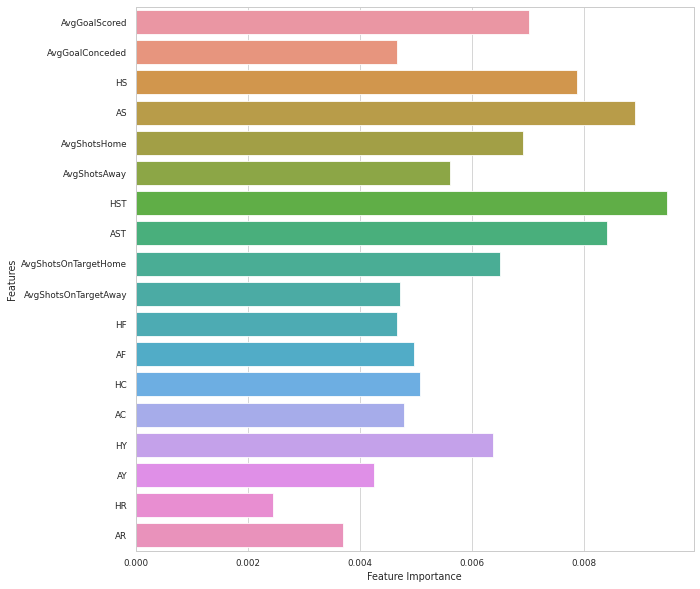

In [60]:
sns.set_context('paper')
sns.set_style('whitegrid')
ax = sns.barplot(x = normalized_features, y = X_feature.columns)
ax.set(xlabel = 'Feature Importance', ylabel = 'Features')
ax.figure.set_size_inches(10,10)
plt.tight_layout
plt.show

Univariate Selection - SelectKBest

In [55]:
model_kbest = SelectKBest(score_func=chi2)
kbest = model_kbest.fit(X_feature, Y_feature)
dffeatures = pd.DataFrame(X_feature.columns)
dfscores = pd.DataFrame(kbest.scores_)
KBest_features = pd.concat([dffeatures,dfscores], axis=1)
KBest_features.columns = ['Features', 'Scores']
display(KBest_features.sort_values('Scores', ascending=False))

,Features,Scores
6,HST,862.528539
7,AST,785.580553
3,AS,615.367850
2,HS,495.879483
4,AvgShotsHome,224.275825
8,AvgShotsOnTargetHome,191.523608
16,HR,97.781522
14,HY,73.893451
5,AvgShotsAway,60.765746
0,AvgGoalScored,58.988088
